# ***Исследование объявлений о продаже квартир***

### Оглавление
* [*Введение*](#text_0)
* [*Открытие файла с данными и изучение общей информации*](#text_1)
* [*Предобработка данных*](#text_2)
    *  [*Проверка наличия дабликатов в датасете*](#text_4)
    *  [*Проверка соответствия типов данных и анализ пропущенных значений*](#text_3)
    *  [*Вывод*](#text_5)
*  [*Расчет и добавление данных в таблицу*](#text_6)
    * [*Расчет дня недели, месяц и год публикации объявления и внесение в датасет.*](#text_7)
    * [*Расчет этажа квартиры в вариантах: первый, последний, другие и внесение в датасет.*](#text_8)
    * [*Расчет цены квадратного метра и внесение в датасет.*](#text_9)
    * [*Расчет соотношения жилой и общей площади, площади кухни к общей и внесение в датасет.*](#text_10)
    * [*Вывод*](#text_11)
* [*Исследовательский анализ данных*](#text_12)
    * [*Исследование следующих параметров: площадь, цена, число комнат, высота потолков.*](#text_13)
    * [*Изучение времени продажи квартиры.*](#text_14)
    * [*Избавление от редких и выбивающихся значений.*](#text_15)
    * [*Исследование факторов влияющих на стоимость квартиры.*](#text_16)
    * [*Анализ средней цены квадратного метра в 10 населённых пунктов с наибольшим числом объявлений.*](#text_17)
    * [*Определение центральной зоны Санкт-Петербурга исходя из стоимости недвижимости*](#text_18)
    * [*Анализ сегмента квартир в центре Санкт-Петербурга.*](#text_19)
    * [*Вывод*](#text_20)
* [*Общий вывод*](#text_21)

**Описание проекта**


В нашем распоряжении данные — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Необходимо определять рыночную стоимость объектов недвижимости.

Описание данных:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

*В ходе работы проведем:*
1. анализ входных данных.
2. обработку информации и изменение типа информации. 
3. расчет дополнительной информации.
4. исследовательский анализ данных информации.
5. обобщим результаты и сделаем выводы о результатах проведенной работы.

### <a id="text_1"></a> Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

from pymystem3 import Mystem
m = Mystem()
data = pd.read_csv(r'C:\Users\mind2\Downloads\real_estate_data.csv', sep='\t' , decimal=',') 

In [2]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   total_images          23699 non-null  int64 
 1   last_price            23699 non-null  object
 2   total_area            23699 non-null  object
 3   first_day_exposition  23699 non-null  object
 4   rooms                 23699 non-null  int64 
 5   ceiling_height        14504 non-null  object
 6   floors_total          23613 non-null  object
 7   living_area           21796 non-null  object
 8   floor                 23699 non-null  int64 
 9   is_apartment          2775 non-null   object
 10  studio                23699 non-null  bool  
 11  open_plan             23699 non-null  bool  
 12  kitchen_area          21421 non-null  object
 13  balcony               12180 non-null  object
 14  locality_name         23650 non-null  object
 15  airports_nearest      18157 non-null

### Вывод

Данные представляют из себя массив информации, состоящий из 22 столбцов и 23699 строк. Информация, в-основном, представлена в виде чисел, а также 1 столбец в текстовом виде и 3 в виде булевского массива. Числовые данные имеют *многочисленные пропуски и часть из них записана в типе данных 'object'*.    

### <a id="text_2"></a> Шаг 2. Предобработка данных

<a id="text_4"></a>**2.1 Проверка наличия дабликатов в датасете**

In [4]:
data.duplicated().sum()

0

Проведена проверка на дублирующие элементы. Дубликатов найдено не было.

<a id="text_3"></a>**2.2 Проверка соответствия типов данных и анализ пропущенных значений** 

Проверим корректность заполнения целочисленных столбцов 'total_images', 'rooms', 'floor': 

In [5]:
def Type_check(column):
    total_position = 0
    count_lines = 0
    wrong_lines_content = []
    for row in data[column]:
        try:
            count_lines += 1
            level = int(row)
            total_position += level
        except:
            wrong_lines_content.append(row)
    print('Количество измерений',count_lines)
    print('Некорректные строки',wrong_lines_content)

Type_check('total_images')
Type_check('rooms')
Type_check('floor')

Количество измерений 23699
Некорректные строки []
Количество измерений 23699
Некорректные строки []
Количество измерений 23699
Некорректные строки []


Отрицательных значений нет. Данные имеют формат int. Данные готовы к дальнейшей обработке.

Обработаем столбец 'last_price':

In [6]:
data['last_price'].value_counts()

4500000.0     342
3500000.0     291
4000000.0     260
4300000.0     260
4200000.0     259
             ... 
13460000.0      1
26900000.0      1
480000.0        1
22057100.0      1
8280000.0       1
Name: last_price, Length: 2978, dtype: int64

Сменим тип данных из 'object' сначала во 'float32' (для перевода в числовой формат), а потом в целочисленный формат 'uint32':

In [7]:
data['last_price'] = data['last_price'].astype('float32')
data['last_price'] = data['last_price'].astype('uint32')
data['last_price'].describe().round()

count        23699.0
mean       6541549.0
std       10887013.0
min          12190.0
25%        3400000.0
50%        4650000.0
75%        6800000.0
max      763000000.0
Name: last_price, dtype: float64

Проверим минимальное и максимальное значение в столбце:

In [8]:
data[data['last_price'].isin(('12190', '763000000'))]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,...,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0
12971,19,763000000,400.0,2017-09-30T00:00:00,7,NaN,10.0,250.0,10,NaN,...,NaN,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0


Обнаружен артефакт в виде квартиры в Санкт-Петербурге за 12 190 и в 109 м2. Заменим на 12 190 000. Пропущенные значения отсутствуют.

In [9]:
data['last_price'] = data['last_price'].replace(12190,12190000)

Сменим тип данных из 'object' сначала во 'float16' (для перевода в числовой формат), а потом в целочисленный формат 'uint16':

In [10]:
data['total_area'] = data['total_area'].astype('float16')
data['total_area'] = data['total_area'].astype('uint16')
data['total_area'].describe().round()

count    23699.0
mean        60.0
std         36.0
min         12.0
25%         40.0
50%         52.0
75%         69.0
max        900.0
Name: total_area, dtype: float64

Проверим минимальное и максимальное значение в столбце:

In [11]:
data[data['total_area'].isin(('12', '900'))]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19540,8,420000000,900,2017-12-06T00:00:00,12,2.8,25.0,409.7,25,NaN,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
19904,4,2400000,12,2017-07-19T00:00:00,1,2.55,5.0,10.0,2,NaN,...,NaN,NaN,Санкт-Петербург,21314.0,964.0,1.0,886.0,2.0,45.0,200.0


Привели стобец 'total_area' к формату uint16, приведем столбец к целочисленным значениям. Артефактов обнаружено не было. Пропущенных значений отсутствуют.

Столбец 'first_day_exposition' содержит значения в формате 'object'. Переведем в формат даты.

In [12]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.sample(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19183,5,18500000,190,2018-02-08,4,NaN,18.0,78.0,17,NaN,...,12.3,NaN,Санкт-Петербург,34991.0,11920.0,0.0,NaN,0.0,NaN,383.00000000000006
21440,11,3499000,36,2017-04-27,1,2.7,12.0,19.8,6,NaN,...,8.0,0.0,Санкт-Петербург,29906.0,12738.0,1.0,655.0,0.0,NaN,61.0
9169,12,1890000,30,2017-12-03,1,2.55,5.0,17.0,4,NaN,...,6.5,1.0,Кировск,NaN,NaN,NaN,NaN,NaN,NaN,116.0


Привели данные столбца first_day_exposition к соответствующему типу. В столбце отсутствуют пропуски значений.

Проведем анализ столбца 'rooms':

In [13]:
data['rooms'].describe().round()

count    23699.0
mean         2.0
std          1.0
min          0.0
25%          1.0
50%          2.0
75%          3.0
max         19.0
Name: rooms, dtype: float64

Проведем анализ значений столбца 'rooms' со значением 0.

In [14]:
data.query('rooms == 0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000,27,2017-03-30,0,NaN,24.0,15.5,2,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.00000000000003
349,4,2320000,25,2017-09-27,0,NaN,14.0,17.0,1,NaN,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.00000000000001
440,8,2480000,27,2018-03-12,0,NaN,17.0,24.75,4,NaN,...,NaN,2.0,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000,34,2017-03-28,0,NaN,26.0,24.3,19,NaN,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000,25,2019-02-20,0,NaN,10.0,NaN,7,NaN,...,NaN,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3200000,26,2017-09-01,0,NaN,25.0,18.0,16,NaN,...,NaN,0.0,Санкт-Петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,0,2500000,27,2017-09-28,0,NaN,24.0,18.0,4,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23554,15,3350000,26,2018-09-07,0,NaN,19.0,NaN,8,NaN,...,NaN,NaN,Санкт-Петербург,18090.0,17092.0,0.0,NaN,2.0,112.0,31.0
23592,10,1450000,29,2017-11-11,0,NaN,9.0,18.0,8,NaN,...,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


In [15]:
data.query('rooms == 0 and open_plan == 1')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
349,4,2320000,25,2017-09-27,0,NaN,14.0,17.0,1,NaN,...,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.00000000000001
508,0,3375000,34,2017-03-28,0,NaN,26.0,24.3,19,NaN,...,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
780,9,2600000,26,2018-02-20,0,NaN,18.0,NaN,8,NaN,...,NaN,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.00000000000001
839,14,1900000,35,2017-04-14,0,2.7,5.0,15.0,3,False,...,NaN,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0
946,5,2200000,23,2016-09-27,0,NaN,27.0,18.0,7,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0
1574,0,2200000,22,2017-11-03,0,NaN,18.0,15.0,16,NaN,...,NaN,1.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,81.0
1625,7,1980000,23,2018-02-01,0,NaN,4.0,10.5,3,NaN,...,NaN,1.0,поселок станции Корнево,NaN,NaN,NaN,NaN,NaN,NaN,120.0
2532,5,3500000,27,2018-02-01,0,NaN,18.0,18.7,9,NaN,...,NaN,2.0,Санкт-Петербург,32036.0,8175.0,0.0,NaN,1.0,644.0,70.0
3019,18,2100000,24,2017-11-10,0,NaN,10.0,18.0,6,NaN,...,NaN,2.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0
4115,7,2600000,24,2018-02-01,0,NaN,25.0,18.0,4,NaN,...,NaN,2.0,Санкт-Петербург,10031.0,13330.0,1.0,915.0,0.0,NaN,42.0


In [16]:
data['rooms'] = np.where(data['rooms'] == 0, 1, data['rooms'])
data['rooms'].describe()

count    23699.000000
mean         2.078948
std          1.066196
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Данные столбца rooms имеют 197 значений числа '0'. Стоит отметить, что 197 значений - довольно существенный параметр. такие значения на одном уровне со значениями 5-6 комнатных квартир. Скорее всего, так могут обозначаться **студии**. Пропуски в столбце отсутствуют. 

**59 из 197 квартир, действительно, относятся к квартирам с открытой планировкой. Исходя из того, что раз есть жилая площадь, значит, есть и комнаты. Предположим, что в-основном, это 1 - комнатные квартиры. Заменим пропущенные значения количества комнат на '1'.**

Изменим тип данных с 'object' на 'float32' в столбце 'ceiling_height' и проведем анализ значений.

In [17]:
data['ceiling_height'] = data['ceiling_height'].astype('float16')
data['ceiling_height'] = np.around(data['ceiling_height'], decimals = 1)

In [18]:
data['ceiling_height'].describe().round()

count    14504.0
mean         3.0
std          1.0
min          1.0
25%          2.0
50%          3.0
75%          3.0
max        100.0
Name: ceiling_height, dtype: float64

In [19]:
data.query('ceiling_height>5').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000,55,2018-07-12,2,25.000000,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
464,15,66571000,280,2015-06-11,6,5.199219,8.0,159.5,7,NaN,...,21.1,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
1026,20,155000000,310,2018-10-12,5,5.300781,3.0,190.0,3,NaN,...,63.0,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
1388,20,59800000,399,2015-01-21,5,5.601562,6.0,NaN,6,NaN,...,NaN,0.0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0000000000001
3148,14,2900000,75,2018-11-12,3,32.000000,3.0,53.0,2,NaN,...,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3474,3,1400000,30,2018-03-16,1,8.000000,5.0,15.3,2,False,...,7.3,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
4643,0,4300000,45,2018-02-01,2,25.000000,9.0,30.0,2,NaN,...,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.00000000000003
4876,7,3000000,25,2017-09-27,1,27.000000,25.0,17.0,17,NaN,...,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000,30,2018-10-03,1,24.000000,5.0,19.5,1,True,...,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000,54,2017-10-13,2,27.000000,5.0,30.0,3,NaN,...,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0


Значительное количество значений от 10 до 100 м. Данные получены не корректным заполнением значений. Проведем коррекцию данных

In [20]:
data['ceiling_height'] = np.where(data['ceiling_height'] >= 20, data['ceiling_height'] / 10, data['ceiling_height'])
data.query('ceiling_height>10')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
15061,19,5600000,56,2018-05-11,2,14.000000,14.0,32.4,5,NaN,...,9.1,2.0,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
22309,20,5300000,45,2017-09-30,1,10.296875,16.0,15.5,15,NaN,...,NaN,NaN,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0


Значения меньше 1.5 м можно считать тоже не корректно заполненными, но они не подлежат корректировке.

In [21]:
data.query('ceiling_height<1.5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5712,5,1500000,42,2017-08-14,2,1.200195,2.0,27.5,1,NaN,...,5.2,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
22590,16,6000000,55,2018-10-31,2,1.000000,12.0,32.4,7,NaN,...,10.0,NaN,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0


Заменим пропущенные значения и проведем анализ.

In [22]:
data['ceiling_height'] = data['ceiling_height'].fillna(0)
data['ceiling_height'] = data['ceiling_height'].astype('uint16')
data['ceiling_height'].value_counts().head()

2    11821
0     9195
3     2579
4       86
5        7
Name: ceiling_height, dtype: int64

In [23]:
data.query('ceiling_height==0').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000,40,2018-12-04,1,0,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56,2015-08-20,2,0,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159,2015-07-24,3,0,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
5,10,2890000,30,2018-09-10,1,0,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000,37,2017-11-02,1,0,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0


В столбце высота комнаты выявлены значения больше 10 м. Данные получены не корректным вводом десятичных значений. Сделали корректировку. В столбце находятся 9195 пропущенных значений, что является 38% от всего объема данных в столбце. Сделаем замену на '0'. Для себя отметим, что 0 - является маркером в дальнейшем анализе. Для удобства приведем к целочисленному варианту.

Проведем анализ столбца 'floors_total':

In [24]:
data['floors_total'] = data['floors_total'].astype('float32')
data['floors_total'] = data['floors_total'].fillna('unknown')
data['floors_total'].value_counts().head()

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
Name: floors_total, dtype: int64

Привели столбец к 'float32'. В столбце 86 пропущенных значений. Нету необходимости удалять и менять значения эти значений, так как значения носят информативный характер, а удаление может привести к потере информации.

Рассмотрим столбец 'living_area' и приведем к формату'float16'.

In [25]:
data['living_area'] = data['living_area'].astype('float16')
data['living_area'].describe().round()

count    21796.0
mean         inf
std          inf
min          2.0
25%         19.0
50%         30.0
75%         42.0
max        410.0
Name: living_area, dtype: float64

Проведем замену 1903 значений на значение '0' и помечаем как данные, в которых отсутствуют значения. Проведем данные к формату 'uint16' для удобства дальнейших вычислений.

In [26]:
data['living_area'] = data['living_area'].fillna(0)
data['living_area'] = data['living_area'].astype('uint16')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108,2019-03-07,3,2,16,51,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40,2018-12-04,1,0,11,18,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56,2015-08-20,2,0,5,34,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159,2015-07-24,3,0,14,0,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100,2018-06-19,2,3,14,32,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Проведем анализ данных в столбце 'is_apartment'. Переведем в формат 'bool'. Заменим пропущенные значения на 'False', так как подавляющая часть квартир не является апартаментами.

In [27]:
data['is_apartment'] = data['is_apartment'].fillna(0)
data['is_apartment'] = data['is_apartment'].astype('bool')
data['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

In [28]:
data['studio'].unique()

array([False,  True])

In [29]:
data['open_plan'].unique()

array([False,  True])

Проведем анализ столбца 'kitchen_area'. Сменим тип данных на 'float16' и пропущенные значения заменим на 0 для удобства расчета. 

In [30]:
data['kitchen_area'] = data['kitchen_area'].astype('float16')
data['kitchen_area'] = data['kitchen_area'].fillna(0)
data['kitchen_area'] = data['kitchen_area'].astype('uint16')
data['kitchen_area'].value_counts()

8      2960
6      2719
10     2654
0      2278
7      2152
       ... 
47        1
107       1
87        1
66        1
75        1
Name: kitchen_area, Length: 72, dtype: int64

Проведем анализ столбца 'balcony'. Сменим тип данных на 'float16' и пропущенные значения заменим на 0. Заменим на формат 'uint16'.

In [31]:
data['balcony'] = data['balcony'].astype('float16')
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('uint16')
data['balcony'].value_counts()

0    15277
1     4195
2     3659
5      304
4      183
3       81
Name: balcony, dtype: int64

Проведем анализ столбца 'locality_name' и заменим пропущенные значения на 'unknown'

In [32]:
data['locality_name'] = data['locality_name'].fillna('unknown')
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [33]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].str.replace('ё','е')
data['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет

Проведем анализ столбца 'airports_nearest' и сменим пропущенные значения на 0 и пометим их как пропущенные значения. Сменим тип данных на 'uint32'.

In [34]:
data['airports_nearest'] = data['airports_nearest'].astype('float32')
data['airports_nearest'] = data['airports_nearest'].fillna(0)
data['airports_nearest'] = data['airports_nearest'].astype('uint32')
data['airports_nearest'].value_counts()

0        5543
37434      61
21928      32
39946      30
44870      30
         ... 
41275       1
12990       1
35529       1
9843        1
25019       1
Name: airports_nearest, Length: 8275, dtype: int64

In [35]:
data.query('airports_nearest == 0').sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23333,10,2450000,50,2019-03-26,2,2,6,32,6,False,...,9,2,деревня малое верево,0,NaN,NaN,NaN,NaN,NaN,NaN
23391,8,2600000,50,2017-01-26,2,2,5,27,3,False,...,7,0,поселок любань,0,NaN,NaN,NaN,NaN,NaN,151.0
7237,8,2999000,42,2017-11-27,1,0,16,25,2,False,...,0,2,деревня кудрово,0,NaN,NaN,NaN,NaN,NaN,45.00000000000001
4342,8,2600000,33,2019-02-12,1,2,5,20,1,False,...,9,0,шлиссельбург,0,NaN,NaN,NaN,NaN,NaN,NaN
17600,8,3950000,40,2017-07-08,1,0,18,18,9,False,...,11,0,деревня кудрово,0,NaN,NaN,NaN,NaN,NaN,38.0
11399,5,1980000,30,2016-04-03,1,2,5,16,5,False,...,7,0,шлиссельбург,0,NaN,NaN,NaN,NaN,NaN,165.0
21679,2,3500000,33,2017-11-11,1,0,22,15,17,False,...,8,1,поселок мурино,0,NaN,NaN,NaN,NaN,NaN,82.0
18463,2,3970000,74,2018-01-01,2,0,6,44,2,False,...,11,1,всеволожск,0,NaN,NaN,NaN,NaN,NaN,14.0
20977,9,29849500,175,2018-12-17,3,0,9,0,8,False,...,0,0,санкт-петербург,0,NaN,NaN,NaN,NaN,NaN,NaN
3010,6,850000,48,2016-03-11,2,0,5,0,5,False,...,0,0,бокситогорск,0,NaN,NaN,NaN,NaN,NaN,174.00000000000003


В столбцах, полученных с помощью картографических данных существуют пропущенные значения. Скорее всего пропущенные данные связаны с отсутствием геопозиции объекта недвижимости. По аналогии проработаем данные по другим столбцам, полученным с помощью картографических данных. Данные, в-основном, не определены для загородной недвижимости(вне Санкт-Петербурга). Для дальнейшего анализа пропущенные данные не внесут искажения итоговой информации.

In [36]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('float32')
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0)
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('uint32')
data['cityCenters_nearest'].value_counts()

0        5519
8460       61
20802      32
10720      30
20444      27
         ... 
30310       1
3689        1
5738        1
15983       1
32456       1
Name: cityCenters_nearest, Length: 7643, dtype: int64

In [37]:
data1 = data.query('cityCenters_nearest==0')
data1.query('"санкт-петербург" in locality_name')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
81,9,10949000,68,2018-12-27,1,0,10,0,6,False,...,0,0,санкт-петербург,0,0,NaN,NaN,NaN,NaN,NaN
593,20,4200000,38,2019-04-16,1,2,16,19,10,False,...,10,2,санкт-петербург,0,0,NaN,NaN,NaN,NaN,NaN
604,11,9899000,101,2018-12-12,3,3,5,62,3,False,...,15,0,санкт-петербург,0,0,NaN,NaN,NaN,NaN,NaN
742,7,37000000,161,2016-05-22,3,0,9,84,8,False,...,0,0,санкт-петербург,0,0,NaN,NaN,NaN,NaN,402.0
795,19,7100000,59,2019-02-13,2,3,5,36,2,False,...,12,0,санкт-петербург,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21668,9,4500000,34,2019-03-04,1,0,9,17,3,False,...,8,1,санкт-петербург,0,0,NaN,NaN,NaN,NaN,NaN
21881,15,44500000,169,2019-02-28,3,3,9,101,7,False,...,18,4,санкт-петербург,0,0,NaN,NaN,NaN,NaN,NaN
21955,19,130000000,431,2017-10-02,7,3,8,220,5,False,...,20,5,санкт-петербург,0,0,NaN,NaN,NaN,NaN,161.0
22554,5,3415000,31,2019-04-16,1,0,24,0,14,False,...,8,2,санкт-петербург,0,0,NaN,NaN,NaN,NaN,NaN


Провели анализ количества пропущенных данных для Санкт-Петербурга. 61 строчка относится к потерянным картографическим данным.

In [38]:
data['parks_around3000'] = data['parks_around3000'].astype('float32')
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].astype('uint16')
data['parks_around3000'].value_counts()

0    15624
1     5681
2     1747
3      647
Name: parks_around3000, dtype: int64

In [39]:
data['parks_nearest'] = data['parks_nearest'].astype('float32')
data['parks_nearest'] = data['parks_nearest'].fillna(0)
data['parks_nearest'] = data['parks_nearest'].astype('uint16')
data['parks_nearest'].value_counts()

0       15620
441        67
392        41
173        41
456        40
        ...  
1909        1
268         1
716         1
748         1
828         1
Name: parks_nearest, Length: 996, dtype: int64

In [40]:
data['ponds_around3000'] = data['ponds_around3000'].astype('float32')
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].astype('uint16')
data['ponds_around3000'].value_counts()

0    14589
1     5717
2     1892
3     1501
Name: ponds_around3000, dtype: int64

In [41]:
data['ponds_nearest'] = data['ponds_nearest'].astype('float32')
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)
data['ponds_nearest'] = data['ponds_nearest'].astype('uint16')
data['ponds_nearest'].value_counts()

0       14589
427        70
454        41
153        40
433        39
        ...  
156         1
1275        1
1199        1
1179        1
867         1
Name: ponds_nearest, Length: 1097, dtype: int64

In [42]:
data['days_exposition'] = data['days_exposition'].astype('float32')
data['days_exposition'].value_counts()

45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
1361.0      1
628.0       1
1395.0      1
712.0       1
1082.0      1
Name: days_exposition, Length: 1141, dtype: int64

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  uint32        
 2   total_area            23699 non-null  uint16        
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  uint16        
 6   floors_total          23699 non-null  object        
 7   living_area           23699 non-null  uint16        
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  uint16        
 13  balcony         

### <a id="text_5"></a>Вывод

- Провели анализ столбцов данных файла;
- Проверили корректность заполнения целочисленных столбцов 'total_images', 'rooms', 'floor'. Отрицательных значений нет. Данные имеют формат int. Данные готовы к дальнейшей обработке.
- В столбце 'last_price' сменили тип данных с 'object' сначала во 'float32' (для перевода в числовой формат), а потом в целочисленный формат 'uint32'. Обнаружен артефакт в виде квартиры в Санкт-Петербурге за 12 190, площадью 109 м2. Заменим на 12 190 000. Пропущенные значения отсутствуют.
- Столбец 'total_area' привели через 'float16' привели к 'uint16'. Артефактов обнаружено не было. Пропущенные значения отсутствуют.
- Столбец 'first_day_exposition' содержит значения в формате 'object'. Перевели в формат даты datetime64[ns]. В столбце отсутствуют пропуски значений.
- Провели анализ значений столбца 'rooms' со значением 0. Данные столбца rooms имеют 197 значений числа '0'. Стоит отметить, что 197 значений - довольно существенный параметр. Количество значений на одном уровне со значениями 5-6 комнатных квартир. Скорее всего, так могут обозначаться студии. Значения 0 в столбце заменили на значение '1'.
- Изменим тип данных с 'object' на 'float32' в столбце 'ceiling_height' и проведем анализ значений. Значительное количество значений находятся в диапазоне от 10 до 100 м. Данные получены не корректным заполнением значений. Провели коррекцию данных путем перевода в десятичный формат числа. Значения меньше 1.5 м можно считать тоже не корректно заполненными, но они не подлежат корректировке. В столбце находятся 9195 пропущенных значений, что является 38% от всего объема данных в столбце. Сделаем замену на '0'. Для себя отметим, что 0 - является маркером в дальнейшем анализе. Для удобства приведем к целочисленному варианту.
- Привели столбец 'floors_total' к 'float32'. В столбце 86 пропущенных значений. Нету необходимости удалять и менять значения, так как значения носят информативный характер, а удаление может привести к потере информации. Сменим значение на значение 'unknown'. 
- Привели столбец 'living_area' к формату'float16'. Проведем замену 1903 значений на значение '0' и помечаем как данные, в которых отсутствуют значения. Проведем данные к формату 'uint16' для удобства дальнейших вычислений.
- Провели анализ данных в столбце 'is_apartment'. Перевели в формат 'bool'. Заменим пропущенные значения на 'False', так как подавляющая часть квартир не является апартаментами.
- Столбцы 'studio' и 'open_plan' записаны в формате 'bool'. Пропущенные значения отсутствуют.
- Сменим тип данных в столбце 'kitchen_area' через 'float16' на 'uint16' и пропущенные значения заменим на 0 для удобства расчета. 
- Провели анализ столбца 'balcony'. Сменили тип данных на 'float16' и пропущенные значения заменим на 0. Заменим на формат 'uint16'.
- Провели анализ столбца 'locality_name' и заменили пропущенные значения на 'unknown'.
- Провели анализ столбца 'airports_nearest' и сменили пропущенные значения на 0 и пометили их как пропущенные значения. Сменим тип данных на 'uint32'. Такие же операции провели для столбцов 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest'. В этих столбцах, полученных с помощью картографических данных, существуют пропущенные значения. Скорее всего, пропущенные данные связаны с отсутствием геопозиции объекта недвижимости. Данные, в-основном, не определены для загородной недвижимости(вне Санкт-Петербурга). Пропущенные данные не внесут искажения итоговой информации. Провели анализ количества пропущенных данных для Санкт-Петербурга. 61 строчка относится к потерянным картографическим данным.
- Провели анализ столбца 'days_exposition'. Выявлено 3181 пропущенных значений. Можно предположить, что объявления были актуальны на момент создания датасета. Оставим значения без изменений.
- Проведена проверка на дублирующие элементы. Дубликатов найдено не было.
- Изменение типов данных столбцов позволило уменьшить размер памяти почти в 2 раза с 3.7 до 1.9 МВ.

### <a id="text_6"></a> Шаг 3. Посчитайте и добавьте в таблицу

<a id="text_7"></a>**3.1 Расчет дня недели, месяц и год публикации объявления и внесение в датасет.**

In [44]:
data['week'] = data['first_day_exposition'].dt.weekday
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,week,month,year
9316,3,14000000,127,2019-02-10,4,3,5,79,3,False,...,20904,1162,1,581,2,94,NaN,6,2,2019
10580,8,5790000,53,2016-03-14,2,3,5,33,2,False,...,31276,5131,2,172,2,482,303.0,0,3,2016
10652,1,4850000,40,2017-02-08,1,2,16,36,13,False,...,34201,14069,0,0,0,0,369.0,2,2,2017
986,10,1950000,62,2015-02-19,3,0,5,0,5,False,...,0,0,0,0,0,0,1069.0,3,2,2015
20014,15,25000000,102,2017-06-15,3,3,17,56,15,False,...,39140,10364,2,173,3,196,180.0,3,6,2017
20893,18,6800000,85,2019-02-09,5,2,9,38,4,False,...,0,0,0,0,0,0,NaN,5,2,2019
12868,9,8200000,100,2017-01-06,4,2,20,60,18,False,...,16248,13838,0,0,2,162,NaN,4,1,2017
12024,4,35000000,107,2015-08-19,3,0,7,54,5,False,...,32888,5980,1,475,3,463,879.0,2,8,2015
14026,2,5270000,89,2018-07-05,3,0,25,48,15,False,...,12431,18188,0,0,0,0,124.0,3,7,2018
21857,20,18500000,125,2018-06-10,4,4,6,80,1,False,...,24879,6177,1,540,0,0,NaN,6,6,2018


<a id="text_8"></a>**3.2 Расчет этажа квартиры в вариантах: первый, последний, другие и внесение в датасет.**

In [45]:
data = data.rename({'floor': 'flr'}, axis=1)

In [46]:
data['variant_floor'] = data['flr']
floor_sp = data.query('flr == 1')

floor_sp['variant_floor'] = floor_sp.where(floor_sp['flr'] != 1, 'первый')
floor_sp1 = floor_sp

floor_sp = data.query('flr == floors_total')
floor_sp['variant_floor'] = (
    floor_sp
    .where(floor_sp['flr'] != floor_sp['floors_total'], 'последний')
)

floor_spL = floor_sp

floor_sp = data.query('flr != 1 and flr != floors_total') 
floor_sp['variant_floor'] = floor_sp.where(floor_sp['flr'] == 1, 'другие')


data_new = pd.concat([floor_sp1,floor_spL,floor_sp])
data_new['variant_floor'].value_counts()

<ipython-input-46-aec7f2c4ff47>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  floor_sp['variant_floor'] = floor_sp.where(floor_sp['flr'] != 1, 'первый')
<ipython-input-46-aec7f2c4ff47>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  floor_sp['variant_floor'] = (
<ipython-input-46-aec7f2c4ff47>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

другие       17446
последний     3361
первый        2917
Name: variant_floor, dtype: int64

<a id="text_9"></a>**3.3 Расчет цены квадратного метра и внесение в датасет.**

In [47]:
data_new['cost_m2'] = data_new['last_price'] / data_new['total_area'] 
data_new['cost_m2'] = data_new['cost_m2'].astype('int32')
data_new.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,flr,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,week,month,year,variant_floor,cost_m2
1031,9,3220000,33,2018-04-20,1,0,25,15,10,False,...,0,0,0,0,113.0,4,4,2018,другие,97575
16304,6,5890000,45,2018-06-18,1,2,25,20,4,False,...,2,532,2,246,NaN,0,6,2018,другие,130888
18873,15,58500000,187,2017-08-17,3,0,7,63,2,False,...,2,230,3,215,5.0,3,8,2017,другие,312834
18350,11,7625000,51,2018-10-21,2,2,12,0,1,False,...,1,627,0,0,NaN,6,10,2018,первый,149509
4297,14,7800000,80,2019-02-25,3,2,12,47,5,False,...,1,398,2,474,NaN,0,2,2019,другие,97500
23687,6,3200000,39,2017-12-16,1,0,9,20,6,False,...,0,0,0,0,38.0,5,12,2017,другие,82051
23464,12,4250000,48,2017-05-05,4,0,5,37,5,False,...,0,0,1,493,131.0,4,5,2017,последний,88541
2908,15,2480000,37,2017-06-16,1,0,9,18,7,False,...,0,0,0,0,5.0,4,6,2017,другие,67027
20534,18,3600000,31,2016-04-13,1,2,23,15,11,True,...,0,0,0,0,767.0,2,4,2016,другие,116129
16811,15,3550000,46,2018-07-20,2,0,5,30,4,False,...,0,0,0,0,16.0,4,7,2018,другие,77173


<a id="text_10"></a>**3.4 Расчет соотношения жилой и общей площади, площади кухни к общей и внесение в датасет.**

In [48]:
data_new['livetotal'] = data_new['living_area'] / data_new['total_area']
data_new.sample(6)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,flr,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,week,month,year,variant_floor,cost_m2,livetotal
8841,3,4520000,41,2018-08-30,1,0,18,20,13,False,...,739,1,758,54.0,3,8,2018,другие,110243,0.487805
9024,2,7986000,75,2017-03-21,2,0,11,40,8,False,...,0,2,520,270.0,1,3,2017,другие,106480,0.533333
19797,0,12600000,78,2019-04-25,2,0,8,0,6,False,...,471,0,0,NaN,3,4,2019,другие,161538,0.000000
13359,3,4990000,52,2017-12-13,1,0,4,0,1,False,...,489,0,0,35.0,2,12,2017,первый,95961,0.000000
17018,12,4150000,45,2017-11-10,2,0,9,27,9,False,...,475,1,698,3.0,4,11,2017,последний,92222,0.600000
21511,7,7203654,48,2017-03-21,1,0,19,17,16,False,...,0,1,436,218.0,1,3,2017,другие,150076,0.354167


In [49]:
data_new['kittotal'] = data_new['kitchen_area'] / data_new['total_area']
data_new.sample(6)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,flr,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,week,month,year,variant_floor,cost_m2,livetotal,kittotal
7758,12,4900000,62,2016-04-08,2,2,10,35,10,False,...,0,0,596.0,4,4,2016,последний,79032,0.564516,0.161290
2458,6,2600000,54,2017-08-28,2,2,5,26,2,False,...,0,0,14.0,0,8,2017,другие,48148,0.481481,0.148148
21897,11,9600000,62,2019-05-01,3,2,5,36,1,False,...,3,398,NaN,2,5,2019,первый,154838,0.580645,0.193548
6690,20,7800000,80,2018-10-12,3,2,12,47,3,False,...,0,0,9.0,4,10,2018,другие,97500,0.587500,0.175000
7041,13,9700000,156,2016-09-13,4,3,7,79,5,False,...,0,0,884.0,1,9,2016,другие,62179,0.506410,0.083333
15136,15,4580000,46,2018-09-03,1,2,10,25,5,False,...,1,164,23.0,0,9,2018,другие,99565,0.543478,0.173913


### <a id="text_11"></a> Вывод

1. Провели расчет дня недели, месяц и год публикации объявления и внесли в датасет.
2. Провели расчет этажа квартиры в вариантах: первый, последний, другие и внесли в датасет.
3. Провели расчет цены квадратного метра и внесли в датасет.
4. Провели расчет соотношения жилой и общей площади, площади кухни к общей и внесли в датасет.

### <a id="text_12"></a> Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

<a id="text_13"></a>**4.1 Исследование следующих параметров: площадь, цена, число комнат, высота потолков.** 

In [50]:
data_new.describe()

,total_images,last_price,total_area,rooms,ceiling_height,living_area,flr,kitchen_area,balcony,airports_nearest,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,week,month,year,cost_m2,livetotal,kittotal
count,23724.000000,2.372400e+04,23724.000000,23724.000000,23724.000000,23724.000000,23724.000000,23724.000000,23724.000000,23724.000000,...,23724.000000,23724.000000,23724.000000,20538.000000,23724.000000,23724.000000,23724.000000,2.372400e+04,23724.000000,23724.000000
mean,9.858413,6.538107e+06,60.122028,2.079202,1.342775,31.460040,5.887203,9.327137,0.590457,22049.282962,...,167.147108,0.590583,198.998525,180.853973,2.569170,6.400143,2017.367560,9.982093e+04,0.517251,0.165693
std,5.682480,1.088214e+07,35.655424,1.065850,1.124853,23.078886,4.885254,6.395829,0.958984,16465.289386,...,306.594518,0.883901,305.131222,219.658051,1.789183,3.492028,1.039556,5.042652e+04,0.183812,0.087919
min,0.000000,4.300000e+05,12.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2014.000000,7.962000e+03,0.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,0.000000,17.000000,2.000000,6.000000,0.000000,10142.750000,...,0.000000,0.000000,0.000000,45.000000,1.000000,3.000000,2017.000000,7.692300e+04,0.463415,0.116667
50%,9.000000,4.650000e+06,52.000000,2.000000,2.000000,29.000000,4.000000,9.000000,0.000000,21860.000000,...,0.000000,0.000000,0.000000,95.000000,3.000000,6.000000,2017.000000,9.541450e+04,0.555556,0.158730
75%,14.000000,6.799000e+06,69.000000,3.000000,2.000000,41.000000,8.000000,11.000000,1.000000,34324.000000,...,301.000000,1.000000,389.000000,232.000000,4.000000,10.000000,2018.000000,1.148640e+05,0.629032,0.218750
max,50.000000,7.630000e+08,900.000000,19.000000,14.000000,409.000000,33.000000,112.000000,5.000000,84869.000000,...,3190.000000,3.000000,1344.000000,1580.000000,6.000000,12.000000,2019.000000,1.907500e+06,1.000000,0.787879


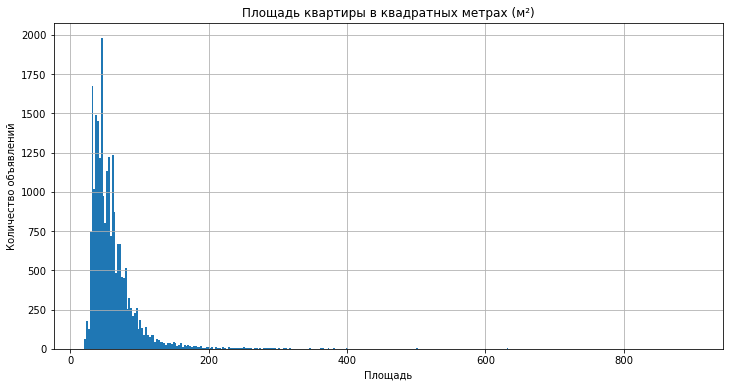

In [51]:
data_new['total_area'].hist(bins=330, range=(20, 900), figsize=(12, 6))
plt.title('Площадь квартиры в квадратных метрах (м²)')
plt.xlabel('Площадь')
plt.ylabel('Количество объявлений')
plt.show()

Значения площади находятся в диапазоне от 12 до 900. 75% значений находятся до 69. Исходя из графика видно, что значения площади находятся до 200, а после 200 значения носят единичный характер. Большая часть значений входит в значения до 100.

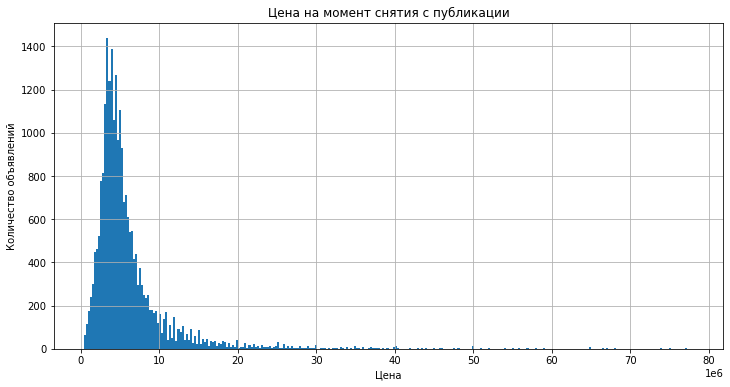

In [52]:
data_new['last_price'].hist(bins=300, range=(400_000, 78_000_000), figsize=(12, 6))
plt.title('Цена на момент снятия с публикации')
plt.xlabel('Цена')
plt.ylabel('Количество объявлений')
plt.ticklabel_format(axis='x', scilimits=(6, 6))

Значения цены находятся в диапазоне от 430 тыс. до 768 млн. 75% значений находятся до 6,8 млн. Исходя из графика видно, что значения цены находятся до 30 млн., а после 30 млн. значения носят единичный характер. Большая часть значений входит в значения до 10 млн.

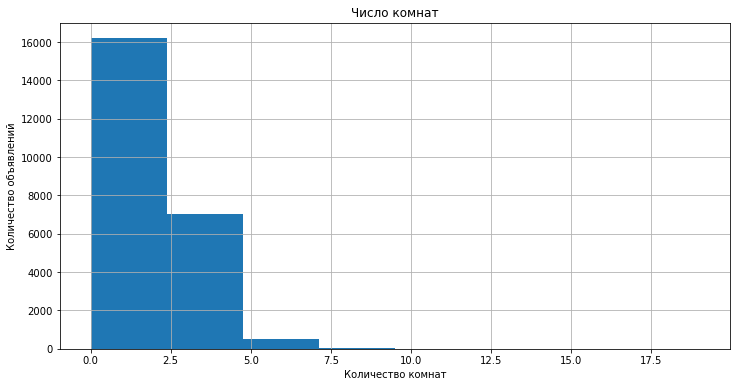

In [53]:
data_new['rooms'].hist(bins=8, range=(0, 19), figsize=(12, 6))
plt.title('Число комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.show()

Значения количества комнат находятся в диапазоне от 0 до 19. 75% значений находятся в пределах 3 комнат. Исходя из графика видно, что значения количества комнат находятся до 9, а после 9 значения носят единичный характер. Большая часть значений входит в значения до 5 комнат.

In [54]:
data = data_new.query('ceiling_height>0')

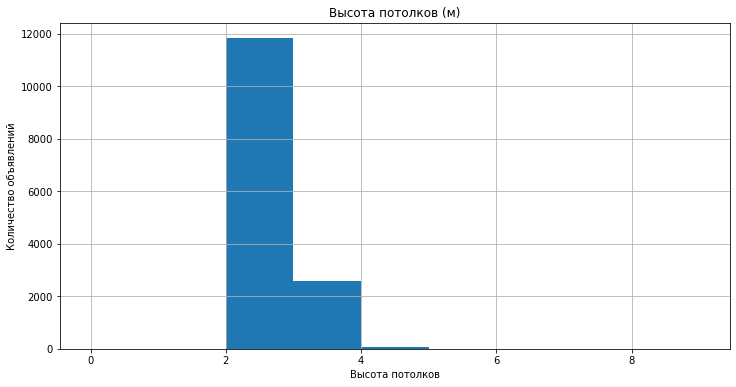

In [55]:
data['ceiling_height'].hist(bins=9, range=(0, 9), figsize=(12, 6))
plt.title('Высота потолков (м)')
plt.xlabel('Высота потолков')
plt.ylabel('Количество объявлений')
plt.show()

Значения высоты потолков находятся в диапазоне от 1 м до 14 м. 75% значений находятся в пределах 2 м. Исходя из графика видно, что значения высоты потолков находятся от 2 до 4 м, а после 4 м значения носят единичный характер. Большая часть значений входит в значения от 2 м до 3 м.

In [56]:
data['ceiling_height'].describe()

count    14514.000000
mean         2.194846
std          0.444925
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         14.000000
Name: ceiling_height, dtype: float64

<a id="text_14"></a>**4.2 Изучение времени продажи квартиры.**

Отфильтруем данные условием количество дней продажи не равно 0. Выведем гистограмму.

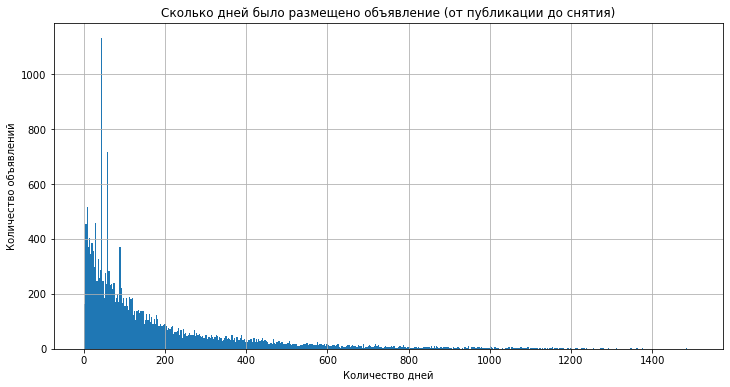

In [57]:
time_sale = data_new.query('days_exposition != 0')
time_sale['days_exposition'].hist(bins=500, range=(1, 1500), figsize=(12, 6))
plt.title('Сколько дней было размещено объявление (от публикации до снятия)')
plt.xlabel('Количество дней')
plt.ylabel('Количество объявлений')
plt.show()

Посчитаем среднее значение:

In [58]:
time_sale['days_exposition'].mean()

180.85397338867188

Посчитаем медиану:

In [59]:
time_sale['days_exposition'].median()

95.0

In [60]:
time_sale['days_exposition'].describe()

count    20538.000000
mean       180.853973
std        219.658051
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Продажа недвижимости занимает в подавляющем количестве случаев занимает от 1 до 600 дней. 75% квартир были проданы в течение 248 дней. Среднее значение дней продажи составляет 190 дней, а медиана значений дней продаж (или 50% продаж) составляет 103 дня. Из вышесказанного можно сделать вывод, что обычно продажи составляют от 1 до 248 дней. Можно считать, что продажи прошли очень быстро от 1 до 45 дня, а необычно долго более 248 дней.    

<a id="text_15"></a>**4.3 Избавление от редких и выбивающихся значений.**

Проведем процедуру избавления от редких и выбивающихся значений при помощи диаграммы размаха.

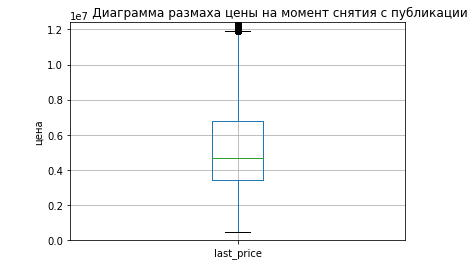

In [61]:
data_new.boxplot(column='last_price')
plt.title('                      Диаграмма размаха цены на момент снятия с публикации')
plt.ylabel('цена')
plt.ylim(0, 12400000)
plt.show()

Диаграмма размаха показывает, что среднее значение находится в районе 5 млн. А значения свыше 12 млн. считаются выбросами. Необходимо отфильтровать значения свыше 12 млн.

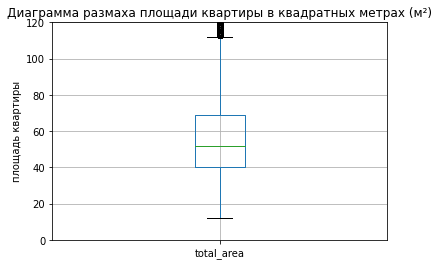

In [62]:
data_new.boxplot(column='total_area')
plt.title('Диаграмма размаха площади квартиры в квадратных метрах (м²)')
plt.ylabel('площадь квартиры')
plt.ylim(0, 120)
plt.show()

Диаграмма размаха показывает, что среднее значение находится в районе 50 м2. А значения свыше 112 м2 считаются выбросами. Необходимо отфильтровать значения свыше 112 м2.

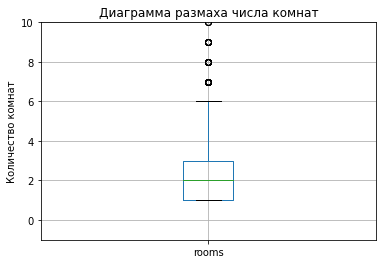

In [63]:
data_new.boxplot(column='rooms')
plt.title('Диаграмма размаха числа комнат')
plt.ylabel('Количество комнат')
plt.ylim(-1, 10)
plt.show()

Диаграмма размаха показывает, что среднее значение находится в значении 2 комнаты. А значения свыше 6 комнат считаются выбросами. Необходимо отфильтровать значения свыше 6 комнат.

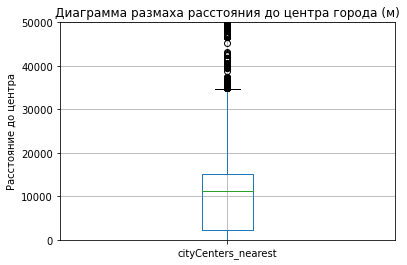

In [64]:
data_new.boxplot(column='cityCenters_nearest')
plt.title('Диаграмма размаха расстояния до центра города (м)')
plt.ylabel('Расстояние до центра')
plt.ylim(0, 50000)
plt.show()

Диаграмма размаха показывает, что среднее значение находится в значении 11000 м. А значения свыше 35000 м считаются выбросами. Необходимо отфильтровать значения свыше 35000 м.

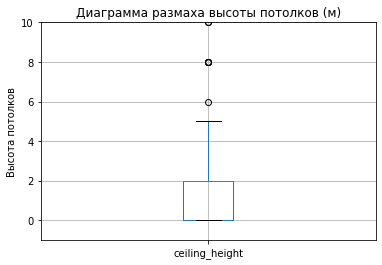

In [65]:
data_new.boxplot(column='ceiling_height')
plt.title('Диаграмма размаха высоты потолков (м)')
plt.ylabel('Высота потолков')
plt.ylim(-1, 10)
plt.show()

Диаграмма размаха показывает, что среднее значение высоты потолка находится в значении 2 м. А значения свыше 5 м считаются выбросами. Необходимо отфильтровать значения свыше 5 м.

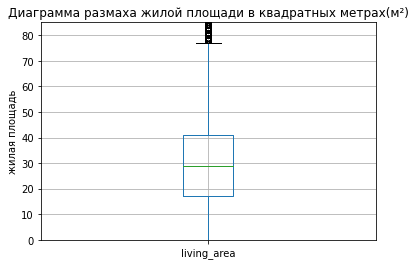

In [66]:
data_new.boxplot(column='living_area')
plt.title('Диаграмма размаха жилой площади в квадратных метрах(м²)')
plt.ylabel('жилая площадь')
plt.ylim(0, 85)
plt.show()

Диаграмма размаха показывает, что среднее значение жилой площади находится в районе 29 м2. А значения свыше 77 м2 считаются выбросами. Необходимо отфильтровать значения свыше 77 м2.

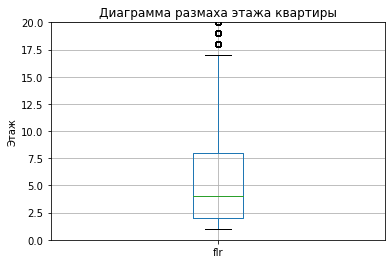

In [67]:
data_new.boxplot(column='flr')
plt.title('Диаграмма размаха этажа квартиры')
plt.ylabel('Этаж')
plt.ylim(0, 20)
plt.show()

Диаграмма размаха показывает, что среднее значение этажа находится в значении 4. А значения свыше 18 считаются выбросами. Необходимо отфильтровать значения свыше 18 этажа.

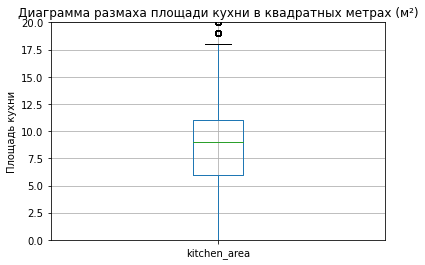

In [68]:
data_new.boxplot(column='kitchen_area')
plt.title('Диаграмма размаха площади кухни в квадратных метрах (м²)')
plt.ylabel('Площадь кухни')
plt.ylim(0, 20)
plt.show()

Диаграмма размаха показывает, что среднее значение площади кухни находится в значении 9 м2. А значения свыше 18 м2 считаются выбросами. Необходимо отфильтровать значения свыше 18 м2.

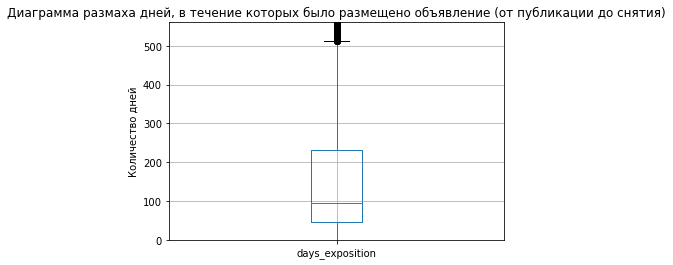

In [69]:
data_new.boxplot(column='days_exposition')
plt.title ('Диаграмма размаха дней, в течение которых было размещено объявление (от публикации до снятия)')
plt.ylabel('Количество дней')
plt.ylim(0, 560)
plt.show()

Диаграмма размаха показывает, что среднее значение количества дней продажи находится в значении 95. А значения свыше 550 считаются выбросами. Необходимо отфильтровать значения свыше 550.

Построим гистограмму для столбца 'days_exposition' со значениями от 1 до 550

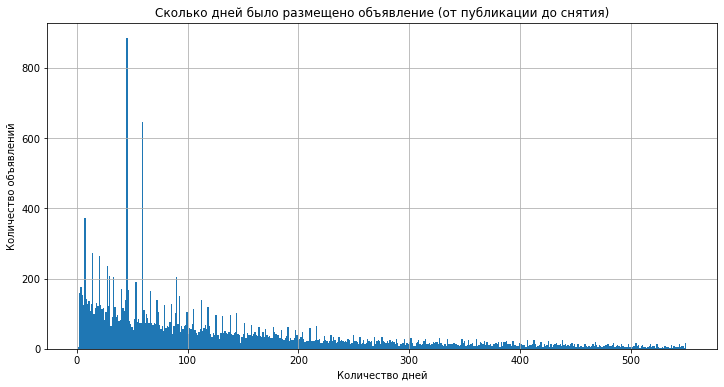

In [70]:
data_new['days_exposition'].hist(bins=465, range=(1, 550), figsize=(12, 6))
plt.title('Сколько дней было размещено объявление (от публикации до снятия)')
plt.xlabel('Количество дней')
plt.ylabel('Количество объявлений')
plt.show()

Проведем анализ значений выбросов

In [71]:
sample1 = data_new.query('50 < days_exposition < 100')
sample2 = data_new.query('1 < days_exposition < 50')

In [72]:
sample2.groupby('days_exposition').count()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,flr,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,week,month,year,variant_floor,cost_m2,livetotal,kittotal
days_exposition,,,,,,,,,,,,,,,,,,,,,
2.0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
3.0,158,158,158,158,158,158,158,158,158,158,...,158,158,158,158,158,158,158,158,158,158
4.0,176,176,176,176,176,176,176,176,176,176,...,176,176,176,176,176,176,176,176,176,176
5.0,152,152,152,152,152,152,152,152,152,152,...,152,152,152,152,152,152,152,152,152,152
6.0,125,125,125,125,125,125,125,125,125,125,...,125,125,125,125,125,125,125,125,125,125
7.0,234,234,234,234,234,234,234,234,234,234,...,234,234,234,234,234,234,234,234,234,234
8.0,139,139,139,139,139,139,139,139,139,139,...,139,139,139,139,139,139,139,139,139,139
9.0,143,143,143,143,143,143,143,143,143,143,...,143,143,143,143,143,143,143,143,143,143
10.0,127,127,127,127,127,127,127,127,127,127,...,127,127,127,127,127,127,127,127,127,127


In [73]:
sample1.groupby('days_exposition').count()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,flr,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,week,month,year,variant_floor,cost_m2,livetotal,kittotal
days_exposition,,,,,,,,,,,,,,,,,,,,,
51.0,53,53,53,53,53,53,53,53,53,53,...,53,53,53,53,53,53,53,53,53,53
52.0,84,84,84,84,84,84,84,84,84,84,...,84,84,84,84,84,84,84,84,84,84
53.0,81,81,81,81,81,81,81,81,81,81,...,81,81,81,81,81,81,81,81,81,81
54.0,110,110,110,110,110,110,110,110,110,110,...,110,110,110,110,110,110,110,110,110,110
55.0,75,75,75,75,75,75,75,75,75,75,...,75,75,75,75,75,75,75,75,75,75
56.0,86,86,86,86,86,86,86,86,86,86,...,86,86,86,86,86,86,86,86,86,86
57.0,74,74,74,74,74,74,74,74,74,74,...,74,74,74,74,74,74,74,74,74,74
58.0,72,72,72,72,72,72,72,72,72,72,...,72,72,72,72,72,72,72,72,72,72
59.0,106,106,106,106,106,106,106,106,106,106,...,106,106,106,106,106,106,106,106,106,106


В результате анализа выяснилось, что выбросы в столбце 'days_exposition' находятся в значении 7, 30, 45, 60 и 90 дней. Скорее всего, результаты в эти дни являются искусственными. Предположения:
1. Дни являются отражением календарного года, т.е 1 неделя, 1 месяц, 1,5 месяца, 2 месяца, 3 месяца и в эти дни производили отчетные срезы с суммированием по продажам. но вид выбросов показывает, что сложения не происходит.
2. Эти даты являются дедлайнами для продаж и к этим дням старались продать объект.

In [74]:
perc =[.20, .40, .60, .99]
data_new.describe(percentiles = perc, include = 'all').T.head(20)

<ipython-input-74-10fca5d90eb0>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data_new.describe(percentiles = perc, include = 'all').T.head(20)


,count,unique,top,freq,first,last,mean,std,min,20%,40%,50%,60%,99%,max
total_images,23724,NaN,NaN,NaN,NaT,NaT,9.85841,5.68248,0,5,8,9,11,20,50
last_price,23724,NaN,NaN,NaN,NaT,NaT,6.53811e+06,1.08821e+07,430000,3.18e+06,4.1e+06,4.65e+06,5.29e+06,3.6e+07,7.63e+08
total_area,23724,NaN,NaN,NaN,NaT,NaT,60.122,35.6554,12,37,46,52,58,197,900
first_day_exposition,23724,1491,2018-02-01 00:00:00,369,2014-11-27,2019-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rooms,23724,NaN,NaN,NaN,NaT,NaT,2.0792,1.06585,1,1,2,2,2,5,19
ceiling_height,23724,NaN,NaN,NaN,NaT,NaT,1.34278,1.12485,0,0,2,2,2,3,14
floors_total,23724,37,5,5788,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
living_area,23724,NaN,NaN,NaN,NaT,NaT,31.46,23.0789,0,17,24,29,32,115,409
flr,23724,NaN,NaN,NaN,NaT,NaT,5.8872,4.88525,1,2,4,4,5,23,33
is_apartment,23724,2,False,23674,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Проведем срез данных, чтобы избавиться от выбросов.

In [75]:
data_new['ceiling_height'].describe().round()

count    23724.0
mean         1.0
std          1.0
min          0.0
25%          0.0
50%          2.0
75%          2.0
max         14.0
Name: ceiling_height, dtype: float64

In [76]:
data_new['ceiling_height'] = np.where(data_new['ceiling_height'] == 0, data_new['ceiling_height'].median(), data_new['ceiling_height'])
data_new['ceiling_height'].describe().round()

count    23724.0
mean         2.0
std          0.0
min          1.0
25%          2.0
50%          2.0
75%          2.0
max         14.0
Name: ceiling_height, dtype: float64

In [77]:
data_new = (
    data_new
    .query('days_exposition < 550')
    .query('rooms < 5')
    .query('cityCenters_nearest < 49574')
    .query('ceiling_height < 5')
    .query('living_area < 121')
    .query('flr < 22')
    .query('kitchen_area < 35')
    .query('total_area < 200')
    .query('last_price < 37173900') 
)

In [78]:
data_new.describe()

,total_images,last_price,total_area,rooms,ceiling_height,living_area,flr,kitchen_area,balcony,airports_nearest,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,week,month,year,cost_m2,livetotal,kittotal
count,18083.000000,1.808300e+04,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000,...,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000
mean,9.639385,5.306242e+06,54.475474,1.940884,2.087485,28.292540,5.779627,8.621523,0.595919,21823.655588,...,161.198418,0.553337,196.726594,131.486862,2.589062,6.606149,2017.347564,95536.628601,0.512927,0.166388
std,5.620936,3.540910e+06,21.830044,0.878462,0.290277,16.350526,4.480554,4.808015,0.946950,16365.700231,...,302.479968,0.849449,306.926217,126.695007,1.789023,3.484278,0.854682,34571.274874,0.185570,0.086732
min,0.000000,4.300000e+05,12.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2015.000000,7962.000000,0.000000,0.000000
25%,6.000000,3.350000e+06,39.000000,1.000000,2.000000,17.000000,2.000000,6.000000,0.000000,9921.000000,...,0.000000,0.000000,0.000000,41.000000,1.000000,3.000000,2017.000000,76505.500000,0.461538,0.119048
50%,9.000000,4.400000e+06,50.000000,2.000000,2.000000,28.000000,4.000000,8.000000,0.000000,21390.000000,...,0.000000,0.000000,0.000000,85.000000,3.000000,7.000000,2017.000000,94047.000000,0.551020,0.161290
75%,14.000000,6.192500e+06,65.000000,3.000000,2.000000,38.000000,8.000000,11.000000,1.000000,34484.000000,...,279.000000,1.000000,381.000000,186.000000,4.000000,10.000000,2018.000000,111594.000000,0.625000,0.222222
max,50.000000,3.700000e+07,199.000000,4.000000,4.000000,118.000000,21.000000,34.000000,5.000000,67844.000000,...,3190.000000,3.000000,1344.000000,549.000000,6.000000,12.000000,2019.000000,642444.000000,1.000000,0.787879


<a id="text_16"></a>**4.4 Исследование факторов влияющих на стоимость квартиры.**

In [79]:
sample3 = data_new.query('cityCenters_nearest !=  0')

In [80]:
sample3.corr()

,total_images,last_price,total_area,rooms,ceiling_height,living_area,flr,is_apartment,studio,open_plan,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,week,month,year,cost_m2,livetotal,kittotal
total_images,1.000000,0.139896,0.103973,0.082787,0.034225,0.122964,0.032840,0.013189,-0.019300,-0.008505,...,0.013181,-0.016502,-0.017839,0.003768,0.000660,0.026510,0.122268,0.127669,0.073935,0.025045
last_price,0.139896,1.000000,0.790958,0.479510,0.335184,0.533777,0.052888,0.014858,-0.052945,-0.030892,...,0.148003,0.199987,0.048091,0.109670,0.004897,0.002800,-0.016073,0.651461,-0.020583,-0.101391
total_area,0.103973,0.790958,1.000000,0.767839,0.294269,0.744040,-0.005923,0.009487,-0.091085,-0.048250,...,0.087129,0.146169,0.039414,0.144288,-0.000937,0.006370,-0.080992,0.114056,0.078528,-0.253204
rooms,0.082787,0.479510,0.767839,1.000000,0.178910,0.723840,-0.151595,-0.009426,-0.083297,-0.038021,...,0.042782,0.051917,0.005413,0.097629,-0.002956,0.007508,-0.062077,-0.128165,0.306596,-0.446421
ceiling_height,0.034225,0.335184,0.294269,0.178910,1.000000,0.249892,-0.143146,0.044328,-0.004015,-0.005291,...,0.094352,0.159432,0.043264,0.084793,-0.016984,-0.002046,0.004242,0.222475,0.047580,-0.040847
living_area,0.122964,0.533777,0.744040,0.723840,0.249892,1.000000,-0.089142,-0.001637,-0.049870,-0.019745,...,0.053000,0.079843,0.022433,0.131975,-0.015539,0.015856,-0.100504,-0.011037,0.672137,-0.150214
flr,0.032840,0.052888,-0.005923,-0.151595,-0.143146,-0.089142,1.000000,-0.018547,0.030893,0.015675,...,-0.067509,-0.064755,-0.015374,-0.029400,0.013119,0.002494,0.016244,0.123349,-0.146016,0.167778
is_apartment,0.013189,0.014858,0.009487,-0.009426,0.044328,-0.001637,-0.018547,1.000000,-0.003031,-0.001833,...,-0.011443,0.016140,0.023455,-0.012440,-0.014151,0.000333,0.028824,0.011798,-0.015817,-0.014275
studio,-0.019300,-0.052945,-0.091085,-0.083297,-0.004015,-0.049870,0.030893,-0.003031,1.000000,-0.003481,...,-0.024010,0.006076,0.012656,-0.019533,-0.002856,0.006385,0.013162,0.036095,0.056158,-0.150727
open_plan,-0.008505,-0.030892,-0.048250,-0.038021,-0.005291,-0.019745,0.015675,-0.001833,-0.003481,1.000000,...,-0.003323,0.008692,0.013389,-0.014687,0.014199,0.015721,-0.017579,0.011894,0.046270,-0.091156


In [81]:
sample4 = sample3.pivot_table(index='cost_m2', values=['last_price', 'total_area', 'rooms', 'cityCenters_nearest'],aggfunc='mean')
sample4.corr()

,cityCenters_nearest,last_price,rooms,total_area
cityCenters_nearest,1.000000,-0.407550,-0.082058,-0.207377
last_price,-0.407550,1.000000,0.421759,0.745275
rooms,-0.082058,0.421759,1.000000,0.761425
total_area,-0.207377,0.745275,0.761425,1.000000


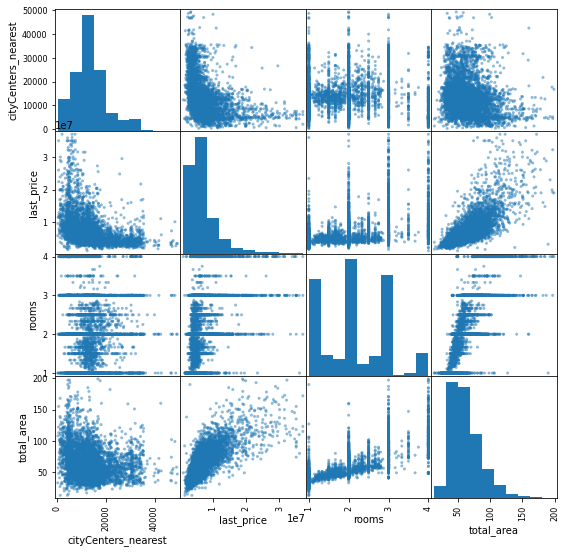

In [82]:
pd.plotting.scatter_matrix(sample4, figsize=(9, 9))
plt.show()

Из анализа данных при помощи матрицы корреляции, можно сделать вывод, что на цену квартиры прямопропорционально влияет площадь и в меньшей степени количество комнат и обратно пропорционально расстояние до центра города.

In [83]:
data_new.pivot_table(index='variant_floor', values='last_price', aggfunc='mean').round()

,last_price
variant_floor,
другие,5548521.0
первый,4155921.0
последний,4987517.0


Из таблицы видно, что средняя цена квартир 'другие' дороже, чем квартиры на первом и последнем этаже.

In [84]:
data_new.pivot_table(index='week', values='last_price', aggfunc='mean')

,last_price
week,
0,5.242314e+06
1,5.338410e+06
2,5.329910e+06
3,5.335332e+06
4,5.288670e+06
5,5.278110e+06
6,5.307675e+06


Из таблицы видно, что средняя цена квартир немного дороже во вторник и в четверг, чем в другие дни.

In [85]:
data_new.pivot_table(index='month', values='last_price', aggfunc='mean')

,last_price
month,
1,5.270710e+06
2,5.293793e+06
3,5.219694e+06
4,5.302136e+06
5,5.386584e+06
6,5.255981e+06
7,5.257292e+06
8,5.377814e+06
9,5.515128e+06


Также из таблицы видно, что средняя цена квартир дороже в сентябре, чем в другие месяцы.

In [86]:
data_new.pivot_table(index='year', values='last_price', aggfunc='mean')

,last_price
year,
2015,5.526289e+06
2016,5.499018e+06
2017,5.340079e+06
2018,5.206105e+06
2019,5.281938e+06


Анализ показал, что в 2015 году средняя цена на квартиры была выше, чем в период с 2016-2019.

<a id="text_17"></a>**4.5 Анализ средней цены квадратного метра в 10 населённых пунктов с наибольшим числом объявлений.**

Выбирем 10 населенных пунктов с наибольшим количеством объявлений и посчитаем средню цену квадратного метра.

In [87]:
locname_c = (
    data_new
    .pivot_table(index='locality_name', values='cost_m2', aggfunc=['mean', 'count'])
    
)
locname_c.columns = ['mean', 'count']
locname_c = (
    locname_c
    .sort_values(by= 'count',ascending = False)
    .head(10)
)
locname_c['mean'] = locname_c['mean'].astype('int32')
locname_c

,mean,count
locality_name,,
санкт-петербург,109041,11947
поселок мурино,86695,485
поселок шушары,78485,372
всеволожск,68904,308
колпино,75013,292
пушкин,101913,275
деревня кудрово,93280,260
гатчина,68367,245
поселок парголово,89202,244


In [88]:
locname_c.query('mean == mean.max() or mean == mean.min()')

,mean,count
locality_name,,
санкт-петербург,109041,11947
выборг,57179,193


Получили, что в Санкт-Петербурге самая высокая стоимость квадратного метра - 109041, а в Выборге наименьшая стоимость квадратного метра - 57179.

<a id="text_18"></a>**4.6 Определение центральной зоны Санкт-Петербурга исходя из стоимости недвижимости**

In [89]:
locality = data_new.query('"санкт-петербург" in locality_name and cityCenters_nearest != 0')
locality['cityCenters_nearest'] = locality['cityCenters_nearest']/1000
locality['cityCenters_nearest'] = locality['cityCenters_nearest'].astype('int32')
localitys = (
    locality
    .pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='mean')   
)
localitys.head()

<ipython-input-89-1b86f049322d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locality['cityCenters_nearest'] = locality['cityCenters_nearest']/1000
<ipython-input-89-1b86f049322d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locality['cityCenters_nearest'] = locality['cityCenters_nearest'].astype('int32')


,last_price
cityCenters_nearest,
0,1.012322e+07
1,1.077981e+07
2,8.888778e+06
3,8.442184e+06
4,1.017793e+07


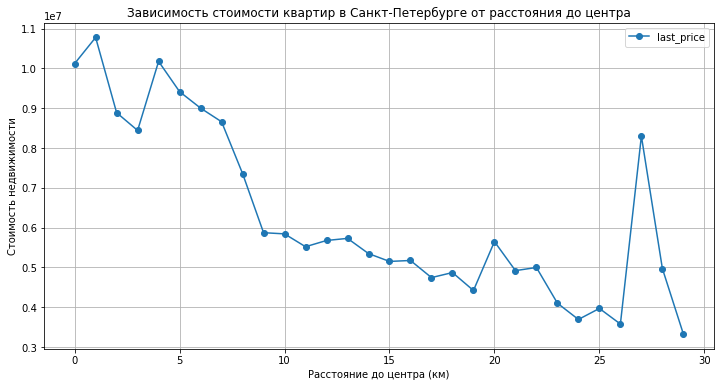

In [90]:
localitys.plot(style='o-', grid=True, figsize=(12, 6))
plt.title('Зависимость стоимости квартир в Санкт-Петербурге от расстояния до центра')
plt.xlabel('Расстояние до центра (км)')
plt.ylabel('Стоимость недвижимости')
plt.show()

Как видно из графика, центральная зона составляет 9000 м, в этом промежутке стоимость недвижимости падает от 11 млн. до почти 6 млн.

<a id="text_19"></a>**4.7 Анализ сегмента квартир в центре Санкт-Петербурга.**

In [91]:
local1 = data_new.query('"санкт-петербург" in locality_name and cityCenters_nearest != 0 and cityCenters_nearest < 9000')
local1['cityCenters_nearest'] = local1['cityCenters_nearest']/1000
local1['cityCenters_nearest'] = local1['cityCenters_nearest'].astype('int32')
localitysi = (
    local1
    .pivot_table(index='cost_m2', values=['last_price','total_area', 'rooms', 'ceiling_height'])
)
localitysi.describe()

<ipython-input-91-5ff00c8500e4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  local1['cityCenters_nearest'] = local1['cityCenters_nearest']/1000
<ipython-input-91-5ff00c8500e4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  local1['cityCenters_nearest'] = local1['cityCenters_nearest'].astype('int32')


,ceiling_height,last_price,rooms,total_area
count,2116.000000,2.116000e+03,2116.000000,2116.000000
mean,2.350196,9.471428e+06,2.363108,72.383948
std,0.472346,5.652541e+06,0.900330,28.612990
min,2.000000,1.600000e+06,1.000000,13.000000
25%,2.000000,5.897500e+06,2.000000,51.000000
50%,2.000000,7.850000e+06,2.000000,68.000000
75%,3.000000,1.120000e+07,3.000000,87.000000
max,4.000000,3.700000e+07,4.000000,197.000000


In [92]:
local = data_new.query('"санкт-петербург" in locality_name and cityCenters_nearest != 0')
local['cityCenters_nearest'] = local['cityCenters_nearest']/1000
local['cityCenters_nearest'] = local['cityCenters_nearest'].astype('int32')

localitys = (
    local
    .pivot_table(index='cost_m2', values=['last_price','total_area', 'rooms', 'ceiling_height'])
)
localitys.describe()

<ipython-input-92-9bf71b0aef9c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  local['cityCenters_nearest'] = local['cityCenters_nearest']/1000
<ipython-input-92-9bf71b0aef9c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  local['cityCenters_nearest'] = local['cityCenters_nearest'].astype('int32')


,ceiling_height,last_price,rooms,total_area
count,5164.000000,5.164000e+03,5164.000000,5164.000000
mean,2.144617,7.397929e+06,2.152568,63.227184
std,0.330369,4.633176e+06,0.864935,24.899663
min,2.000000,1.200000e+06,1.000000,13.000000
25%,2.000000,4.599000e+06,1.469962,45.000000
50%,2.000000,5.950000e+06,2.000000,58.000000
75%,2.000000,8.500000e+06,3.000000,76.000000
max,4.000000,3.700000e+07,4.000000,199.000000


Средняя стоимость недвижимости в центре 9,47 млн, а в городе - 7,39 млн.
Средняя площадь недвижимости в центре 72,38 м2, а в городе - 63,23 м2.
Среднее количество комнат в центре 2,36 комнаты, а в городе 2,15 комнаты.
Средняя высота потолков в центре 2,35, а в городе 2,14.

In [93]:
localitysi['rooms'] = localitysi['rooms'].astype('int32')
loc_room = localitysi.pivot_table(index='rooms', values='last_price', aggfunc='mean')
loc_room

,last_price
rooms,
1,6.308670e+06
2,8.485718e+06
3,1.138193e+07
4,1.359504e+07


In [94]:
localitys['rooms'] = localitys['rooms'].astype('int32')
loc1_room = localitys.pivot_table(index='rooms', values='last_price', aggfunc='mean')
loc1_room

,last_price
rooms,
1,5.106100e+06
2,7.238624e+06
3,9.415356e+06
4,1.222243e+07


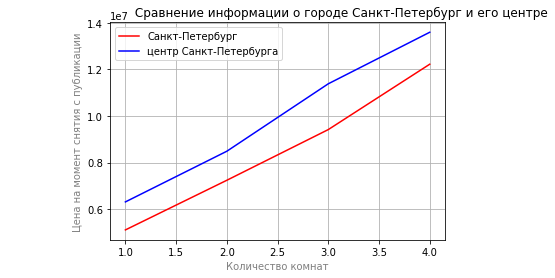

In [95]:
plt.title('                                 Сравнение информации о городе Санкт-Петербург и его центре')
plt.xlabel('Количество комнат', color='gray')
plt.ylabel('Цена на момент снятия с публикации',color='gray')
plt.grid(True)
plt.plot(loc1_room,'r-')
plt.plot(loc_room,'b-')
plt.legend(['Санкт-Петербург','центр Санкт-Петербурга'], loc=0)
plt.show()

Представлены зависимости стоимости квартиры от количества комнат. Стоимость в центре города выше по всем видам квартир, чем в городе в целом и находится в диапазоне для 1 - комнатной квартиры 6,33 млн до 13,6 млн за 4 - комнатную квартиру.

In [96]:
local.pivot_table(index='variant_floor', values='last_price', aggfunc='mean')

,last_price
variant_floor,
другие,6.406566e+06
первый,5.125994e+06
последний,6.384066e+06


In [97]:
local1.pivot_table(index='variant_floor', values='last_price', aggfunc='mean')

,last_price
variant_floor,
другие,9.453881e+06
первый,6.332211e+06
последний,8.895389e+06


Представлены зависимости стоимости квартиры от варианта этажей. Стоимость в центре города выше по всем видам квартир с различными вариантами этажей. Средняя стоимость в центре недвижимости для первых этажей 6,33 млн., для последнего этажа - 8,9 млн, для остальных - 9,45 млн.

In [98]:
local_month = local.pivot_table(index='month', values='last_price', aggfunc='mean')
local_month

,last_price
month,
1,6.377755e+06
2,6.269889e+06
3,6.238981e+06
4,6.169238e+06
5,6.298158e+06
6,6.317726e+06
7,6.154986e+06
8,6.299244e+06
9,6.529259e+06


In [99]:
local1_month = local1.pivot_table(index='month', values='last_price', aggfunc='mean')
local1_month

,last_price
month,
1,8.930174e+06
2,8.946350e+06
3,8.951462e+06
4,8.637760e+06
5,9.208976e+06
6,9.497578e+06
7,8.790101e+06
8,9.231684e+06
9,9.397632e+06


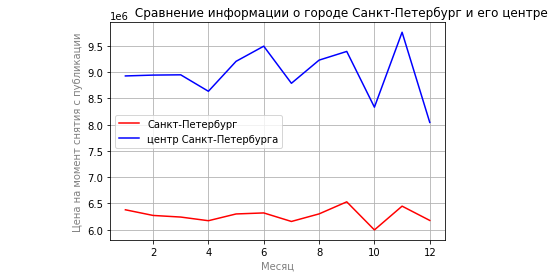

In [100]:
plt.title('                                 Сравнение информации о городе Санкт-Петербург и его центре')
plt.xlabel('Месяц', color='gray')
plt.ylabel('Цена на момент снятия с публикации',color='gray')
plt.grid(True)
plt.plot(local_month,'r-')
plt.plot(local1_month,'b-')
plt.legend(['Санкт-Петербург','центр Санкт-Петербурга'], loc=0)
plt.show()

В городе в целом объявления с более дорогой ценой недвижимости выставлялись в сентябре. В центре города самые дорогие объявления выставлялись в июне.

In [101]:
local_week = local.pivot_table(index='week', values='last_price', aggfunc='mean')
local_week

,last_price
week,
0,6.225087e+06
1,6.261939e+06
2,6.247556e+06
3,6.325968e+06
4,6.220690e+06
5,6.348678e+06
6,6.389887e+06


In [102]:
local1_week = local1.pivot_table(index='week', values='last_price', aggfunc='mean')
local1_week

,last_price
week,
0,8.967751e+06
1,8.937418e+06
2,9.195744e+06
3,8.765305e+06
4,8.936544e+06
5,9.021468e+06
6,9.880708e+06


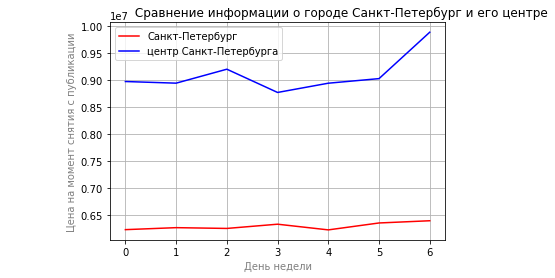

In [103]:
plt.title('                                 Сравнение информации о городе Санкт-Петербург и его центре')
plt.xlabel('День недели', color='gray')
plt.ylabel('Цена на момент снятия с публикации',color='gray')
plt.grid(True)
plt.plot(local_week,'r-')
plt.plot(local1_week,'b-')
plt.legend(['Санкт-Петербург','центр Санкт-Петербурга'], loc=0)
plt.show()

В городе в целом объявления с более дорогой ценой недвижимости выставлялись в субботу и воскресенье. В центре города самые дорогие объявления выставлялись в воскресенье.

In [104]:
local_year = local.pivot_table(index='year', values='last_price', aggfunc='mean')
local_year

,last_price
year,
2015,6.191486e+06
2016,6.451121e+06
2017,6.277313e+06
2018,6.270681e+06
2019,5.992452e+06


In [105]:
local1_year = local1.pivot_table(index='year', values='last_price', aggfunc='mean')
local1_year

,last_price
year,
2015,8.423544e+06
2016,9.816778e+06
2017,9.048677e+06
2018,8.868707e+06
2019,8.083920e+06


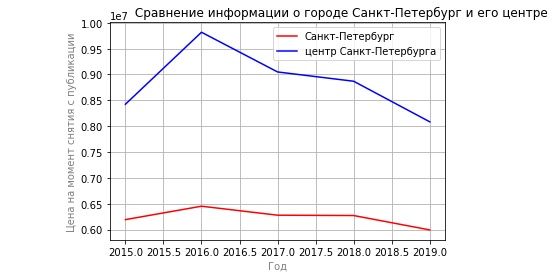

In [106]:
plt.title('                                 Сравнение информации о городе Санкт-Петербург и его центре')
plt.xlabel('Год', color='gray')
plt.ylabel('Цена на момент снятия с публикации',color='gray')
plt.grid(True)
plt.plot(local_year,'r-')
plt.plot(local1_year,'b-')
plt.legend(['Санкт-Петербург','центр Санкт-Петербурга'], loc=1)
plt.show()

В городе в целом, также как и в центре объявления с более дорогой ценой недвижимости выставлялись в 2016 году.

In [107]:
local.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='mean').head(30)

,last_price
cityCenters_nearest,
0,1.012322e+07
1,1.077981e+07
2,8.888778e+06
3,8.442184e+06
4,1.017793e+07
5,9.416791e+06
6,9.003573e+06
7,8.660425e+06
8,7.359343e+06


Цена недвижимости сильно зависит от удаленности от центра города. Средняя цена недвижимости в Санкт-Петербурге на расстоянии 20 км падает с 10 млн. до 5,65 млн, что составляет 44%.

### <a id="text_20"></a>Вывод

В ходе анализа данных выявили следующее:

- Значения площади находятся в диапазоне от 12 до 900. 75% значений находятся до 69. Исходя из графика видно, что значения площади находятся до 200, а после 200 значения носят единичный характер.
- Значения цены находятся в диапазоне от 430 тыс. до 768 млн. 75% значений находятся до 6,8 млн. Исходя из графика видно, что значения цены находятся до 30 млн., а после 30 млн. значения носят единичный характер. 
- Значения количества комнат находятся в диапазоне от 0 до 19. 75% значений находятся в пределах 3 комнат. Исходя из графика видно, что значения количества комнат находятся до 9, а после 9 значения носят единичный характер. 
- Значения высоты потолков находятся в диапазоне от 1 м до 14 м. 75% значений находятся в пределах 2 м. Исходя из графика видно, что значения высоты потолков находятся от 2 до 4 м, а после 4 м значения носят единичный характер. 
- Продажа недвижимости занимает в подавляющем количестве случаев занимает от 1 до 600 дней. 75% квартир были проданы в течение 248 дней. Среднее значение дней продажи составляет 190 дней, а медиана значений дней продаж (или 50% продаж) составляет 103 дня. Из вышесказанного можно сделать вывод, что обычно продажи составляют от 1 до 248 дней. Можно считать, что продажи прошли очень быстро от 1 до 45 дня, а необычно долго более 248 дней.
- Диаграмма размаха показывает:
  * Среднее значение стоимости недвижимости находится в районе 5 млн. А значения свыше 12 млн. считаются выбросами. Отфильтровали значения свыше 12 млн.
  * Среднее значение общей площади недвижимости находится в районе 50 м2. А значения свыше 112 м2 считаются выбросами. Отфильтровали значения свыше 112 м2.
  * Среднее значение количества комнат находится в значении 2 комнаты. А значения свыше 6 комнат считаются выбросами. Отфильтровали значения свыше 6 комнат.
  * Среднее значение расстояния до центра города находится в значении 11000 м. А значения свыше 35000 м считаются выбросами. Отфильтровали значения свыше 35000 м.
  * Среднее значение высоты потолка находится в значении 2 м. А значения свыше 5 м считаются выбросами. Отфильтровали значения свыше 5 м.
  * Среднее значение жилой площади находится в районе 29 м2. А значения свыше 77 м2 считаются выбросами. Отфильтровали значения свыше 77 м2.
  * Среднее значение этажа находится в значении 4. А значения свыше 18 считаются выбросами. Отфильтровали значения свыше 18 этажа.
  * Среднее значение площади кухни находится в значении 9 м2. А значения свыше 18 м2 считаются выбросами. Отфильтровали значения свыше 18 м2.
  * Среднее значение количества дней продажи находится в значении 95. А значения свыше 550 считаются выбросами. Отфильтровали значения свыше 550.
- В результате анализа выяснилось, что выбросы в столбце 'days_exposition' находятся в значении 7, 30, 45, 60 и 90 дней. Скорее всего, результаты в эти дни являются искусственными. 
- Из анализа данных при помощи матрицы корреляции выяснили, что на цену квартиры прямопропорционально влияет площадь и в меньшей степени количество комнат и обратно пропорционально влияет расстояние до центра города.
- Из анализа данных видно, что средняя цена квартир 'другие' дороже, чем квартиры на первом и последнем этаже во всем датасете.
- Из анализа данных видно, что средняя цена квартир дороже во вторник и четверг, чем в другие дни во всем датасете.
- Из анализа данных видно, что средняя цена квартир дороже в сентябре, чем в другие месяцы во всем датасете.
- Анализ показал, что в 2015 году средняя цена на квартиры была выше, чем в период с 2016-2019 во всем датасете.
- В Санкт-Петербурге самая высокая стоимость квадратного метра - 109041, а в Выборге наименьшая стоимость квадратного метра - 57179 среди 10 городов, в которых было подано самое большое количество объявленений. 
- Центральная зона Санкт-Петербурга составляет 9000 м, в этом промежутке стоимость недвижимости падает с 11 млн. до почти 6 млн.
- Средняя стоимость недвижимости в центре 9,47 млн, а в городе - 7,39 млн.Средняя площадь недвижимости в центре 72,38 м2, а в городе - 63,23 м2.Среднее количество комнат в центре 2,36 комнаты, а в городе 2,15 комнаты.Средняя высота потолков в центре 2,35, а в городе 2,14.
- Стоимость в центре города выше по всем видам квартир, чем в городе в целом и находится в диапазоне для 1 - комнатной квартиры 6,33 млн до 13,6 млн за 5-комнатную.
- Стоимость в центре города выше по всем видам квартир с различными вариантами этажей. Средняя стоимость в центре недвижимости для первых этажей 6,33 млн., для последнего этажа - 8,9 млн и для остальных - 9,45 млн.
- В городе в целом объявления с более дорогой ценой недвижимости выставлялись в сентябре В центре города самые дорогие объявления выставлялись в июне.
- В городе в целом объявления с более дорогой ценой недвижимости выставлялись в субботу и воскресенье. В центре города самые дорогие объявления выставлялись в воскресенье.
- В городе в целом, также как и в центре объявления с более дорогой ценой недвижимости выставлялись в 2016 году.
- Цена недвижимости сильно зависит от удаленности от центра города. Средняя цена недвижимости в Санкт-Петербурге на расстоянии 20 км падает с 10 млн. до 5,65 млн, что составляет 44%.

### <a id="text_21"></a> Шаг 5. Общий вывод

1. Данные представляют из себя массив информации, состоящий из **22 столбцов и 23699 строк**. Информация, в-основном, представлена в виде чисел, а также **1 столбец в текстовом виде и 3 в виде булевского массива**. Числовые данные имеют многочисленные пропуски и часть из них записана в типе данных 'object'.

2. Привели следующие столбцы к типам данных:
  - 'bool' - 'is_apartment', 'studio', 'open_plan';
  - 'int64' - 'total_images', 'rooms', 'floor';
  - 'datetime64[ns]' - 'first_day_exposition';
  - 'object' - 'floors_total', 'locality_name';
  - 'uint16' - 'total_area', 'ceiling_height', 'living_area', 'kitchen_area', 'balcony', 'parks_around3000','parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition';
  - 'uint32' - 'airports_nearest', 'cityCenters_neares', 'last_price'.
3. Обнаружены следующие артефакты:
  - в виде квартиры в Санкт-Петербурге в столбце 'last_price' за 12 190, площадью 109 м2. Заменим на 12 190 000;
  - данные столбца 'rooms' имеют 197 значений числа '0'. Стоит отметить, что 197 значений - довольно существенный параметр. **такие значения на одном уровне со значениями 5-6 комнатных квартир**. Скорее всего, так могут обозначаться студии. Поменяли значения 0 на 1.
  - значительное количество значений в столбце 'ceiling_height' находятся в диапазоне от 10 до 100 м. Данные получены не корректным заполнением значений. **Провели коррекцию данных путем перевода в десятичный формат числа.** Значения меньше 1.5 м можно считать тоже не корректно заполненными, но они не подлежат корректировке. В столбце находятся 9195 пропущенных значений, что является 38% от всего объема данных в столбце. Сделаем замену на '0'. Для себя отметим, что 0 - является маркером в дальнейшем анализе.
  - пропущенные значения заменим в столбце 'balcony' на 1, так как хотя бы один балкон а квартирах должен быть в таком большом количестве пропущенных значений.
  - в столбцах 'airports_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', полученных с помощью картографических данных существуют пропущенные значения. Скорее всего **пропущенные данные связаны с отсутствием геопозиции объекта недвижимости**. Данные, в-основном, не определены для загородной недвижимости(вне Санкт-Петербурга). Пропущенные данные не внесут искажения итоговой информации. Провели анализ количества пропущенных данных для Санкт-Петербурга. 61 строчка относится к потерянным картографическим данным.
  - Провели анализ столбца 'days_exposition'. Выявлено 3181 пропущенных значений. Можно предположить, что объявления были актуальны на момент создания датасета. Заменим их на значение '0' и при анализе отфильтруем.
4. Проведена проверка на дублирующие элементы. **Дубликатов найдено не было.**
5. Изменение типов данных столбцов позволило **уменьшить размер памяти почти в 2 раза с 3.7 до 1.9 МВ**.
6. Провели расчет дня недели, месяца и года публикации объявления, этажа квартиры в вариантах: первый, последний, другие, а также провели расчет цены квадратного метра, соотношения жилой и общей площади, площади кухни к общей и внесли в датасет.
7. Значения площади находятся в диапазоне от 12 до 900. **75% значений находятся до 69**. Исходя из графика видно, что значения площади находятся до 200, а **после 200 значения носят единичный характер**.
8. Значения цены находятся в диапазоне от 430 тыс. до 768 млн. **75% значений находятся до 6,8 млн**. Исходя из графика видно, что значения цены находятся до 30 млн., а **после 30 млн. значения носят единичный характер**. 
9. Значения количества комнат находятся в диапазоне от 0 до 19. **75% значений находятся в пределах 3 комнат**. Исходя из графика видно, что значения количества комнат находятся до 9, а **после 9 значения носят единичный характер**. 
10. Значения высоты потолков находятся в диапазоне от 1 м до 14 м. **75% значений находятся в пределах 2 м**. Исходя из графика видно, что значения высоты потолков находятся от 2 до 4 м, а после 4 м значения носят единичный характер. 
11. Продажа недвижимости занимает в подавляющем количестве случаев занимает **от 1 до 600 дней**. **75% квартир были проданы в течение 248 дней. Среднее значение дней продажи составляет 190 дней, а медиана значений дней продаж (или 50% продаж) составляет 103 дня.** Из вышесказанного можно сделать вывод, что обычно продажи составляют **от 1 до 248 дня**. Можно считать, что продажи прошли **очень быстро от 1 до 45 дня, а необычно долго более 248 дней**.
12. Отфильтровали значения:
  * Среднее значение стоимости недвижимости свыше 37 млн. 
  * Среднее значение общей площади недвижимости свыше 200 м2. 
  * Среднее значение количества комнат свыше 5 комнат.  
  * Среднее значение расстояния до центра города свыше 49574 м. 
  * Среднее значение высоты потолка свыше 5 м. 
  * Среднее значение жилой площади свыше 121 м2.
  * Среднее значение этажа свыше 22 этажа.
  * Среднее значение площади кухни свыше 35 м2.
  * Среднее значение количества дней продажи свыше 550.
13. В результате анализа выяснилось, что выбросы в столбце 'days_exposition' находятся в значении 7, 30, 45, 60 и 90 дней. Скорее всего, результаты в эти дни являются искусственными. 
14. Из анализа данных получили:
  - на цену квартиры **прямопропорционально влияет площадь** и в меньшей степени количество комнат и обратно пропорционально влияет расстояние до центра города.
  - **средняя цена квартир 'другие' дороже, чем квартиры на 'первом и последнем этаже' во всем датасете**.
  - **средняя цена квартир дороже во вторник и четверг, чем в другие дни во всем датасете**.
  - **средняя цена квартир дороже в сентябре, чем в другие месяцы во всем датасете**.
  - **в 2015 году средняя цена на квартиры была выше, чем в период с 2016-2019 во всем датасете**.
15. **В Санкт-Петербурге самая высокая стоимость квадратного метра - 109041, а в Выборге наименьшая стоимость квадратного метра - 57179 среди 10 городов, в которых было подано самое большое количество объявленений**. 
16. **Центральная зона Санкт-Петербурга составляет 9000 м**, в этом промежутке стоимость недвижимости падает с 11 млн. до почти 6 млн.
17. **Средняя стоимость недвижимости в центре 9,47 млн, а в городе - 7,39 млн. Средняя площадь недвижимости в центре 72,38 м2, а в городе - 63,23 м2.Среднее количество комнат в центре 2,36 комнаты, а в городе 2,15 комнаты.Средняя высота потолков в центре 2,35, а в городе 2,14**.
18. **Стоимость в центре города выше по всем видам квартир, чем в городе в целом и находится в диапазоне для 1 - комнатной квартиры 6,33 млн до 13,6 млн за 5-комнатную.**.
19. **Стоимость в центре города выше по всем видам квартир с различными вариантами этажей. Средняя стоимость в центре недвижимости для первых этажей 6,33 млн., для последнего этажа - 8,9 млн и для остальных - 9,45 млн**.
20. В городе в целом объявления с более дорогой ценой недвижимости выставлялись **в сентябре**. В центре города самые дорогие объявления выставлялись **в июне**.
21. В городе в целом объявления с более дорогой ценой недвижимости выставлялись **в субботу и воскресенье**. В центре города самые дорогие объявления выставлялись **в воскресенье**.
22. В городе в целом, также как и в центре объявления с более дорогой ценой недвижимости выставлялись **в 2016 году.**
23. Цена недвижимости **сильно зависит от удаленности от центра для города Санкт-Петербург**. **Средняя цена недвижимости в Санкт-Петербурге на расстоянии 20 км падает с 10 млн. до 5,65 млн, что составляет 44%**.